###Elemento de Viga - Problema 9.1 Mecânica dos Materiais Beer 7ª edição - Resposta analítica do solucionário oficial
---

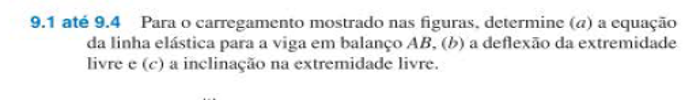

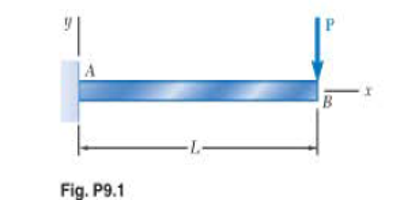

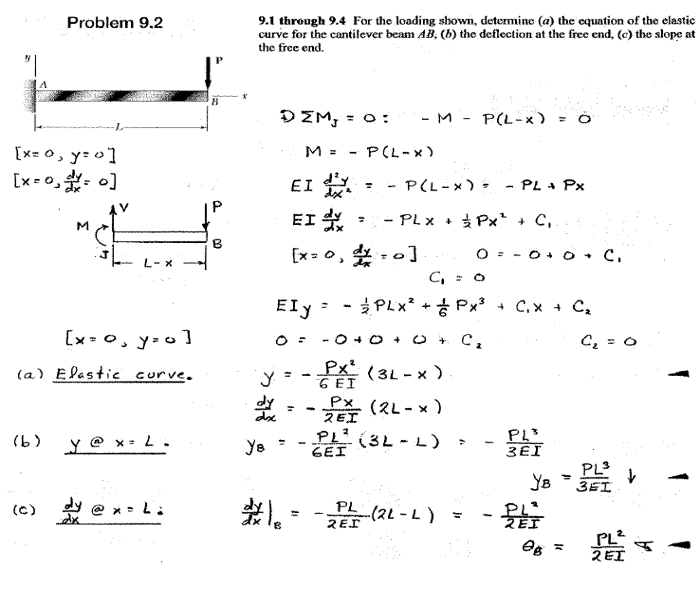

In [ ]:
import requests
from PIL import Image
from io import BytesIO

file_id = '1xYwEkJTsP6NUCy0BWqowLUJJ8NdqYkQ_'
url = f'https://drive.google.com/uc?export=view&id={file_id}'

response = requests.get(url)
img = Image.open(BytesIO(response.content))

new_size = (700, 100)  # (largura, altura) em pixels
img_resized = img.resize(new_size)

display(img_resized)
#https://drive.google.com/file/d/1xYwEkJTsP6NUCy0BWqowLUJJ8NdqYkQ_/view?usp=drive_link

file_id = '1-tLqEEZjLqzHBYhW28i7nCBdeQQ77e8h'
url = f'https://drive.google.com/uc?export=view&id={file_id}'

response = requests.get(url)
img = Image.open(BytesIO(response.content))

new_size = (400, 200)  # (largura, altura) em pixels
img_resized = img.resize(new_size)

display(img_resized)
#https://drive.google.com/file/d/1-tLqEEZjLqzHBYhW28i7nCBdeQQ77e8h/view?usp=drive_link

file_id = '1KWqg4vbrBRQiC4kyFP-IzprFHoviMM2j'
url = f'https://drive.google.com/uc?export=view&id={file_id}'

response = requests.get(url)
img = Image.open(BytesIO(response.content))

new_size = (700, 600)  # (largura, altura) em pixels
img_resized = img.resize(new_size)

display(img_resized)
#https://drive.google.com/file/d/1KWqg4vbrBRQiC4kyFP-IzprFHoviMM2j/view?usp=drive_link

###Parâmetros de Malha

###No Código:
    num_nos = num_elementos + 1
    # Cada nó tem 2 GDL (deflexão e inclinação)
    num_gdl_total = 2 * num_nos
    
    # Comprimento de cada elemento
    le = L / num_elementos:

`num_nos`: O número de nós (pontos de conexão) é sempre um a mais que o número de elementos (num_elementos).

`num_gdl_total`: O MEF para vigas de Euler-Bernoulli considera dois Graus de Liberdade (GDL) por nó:

Deslocamento vertical (deflexão, $v$).

Rotação (inclinação, $θ$).

Portanto, o número total de equações (GDL) é 2×`num_nos`.

`le`: O comprimento de cada elemento (assumindo elementos de mesmo tamanho).

---

###Matriz de Rigidez

###No código

       
    fator_rigidez = E * I / (le**3)
    
    K_e_local = fator_rigidez * np.array([ [ 12   6le   -12   6le   ]
                                           [ 6le  4le^2 -6le  2le^2 ]
                                           [ -12  -6le  12   -6le   ]
                                           [ 6le  2le^2 -6le  4le^2 ])

A matriz de rigidez fundamental de uma viga de Euler-Bernoulli. Ela relaciona as forças e momentos nas extremidades do elemento com os deslocamentos e rotações nessas mesmas extremidades (4 GDL: $v_1$, $θ_1$,$v_2$ , $θ_2$).

O termo $EI$ (Rigidez à Flexão) e o comprimento do elemento ($l_e$) determinam a resistência do elemento à deformação.

---

###Matriz de Rigidez Global

###No Código
    K_global = np.zeros((num_gdl_total, num_gdl_total))

    for e in range(num_elementos):
        # Mapeamento dos GDL globais para o elemento 'e'
        gdl_indices = np.array([2*e, 2*e + 1, 2*(e+1), 2*(e+1) + 1])
        
        # Superposição (Assembly)
        for i_local in range(4):
            for j_local in range(4):
                i_global = gdl_indices[i_local]
                j_global = gdl_indices[j_local]
                K_global[i_global, j_global] += K_e_local[i_local, j_local]

Ele pega a matriz de rigidez de cada elemento (`K_e_local`) e a soma na posição correta dentro da matriz de rigidez global (`K_global`).

Mapeamento de GDL: O vetor `gdl_indices` garante que a contribuição de cada elemento caia nos índices corretos da matriz global.

Por exemplo, o elemento $0$ (entre o Nó 0 e o Nó 1) contribui para os GDL 0, 1, 2 e 3.

O elemento 1 (entre o Nó 1 e o Nó 2) contribui para os GDL 2, 3, 4 e 5.

Os GDL 2 e 3 (Nó 1) recebem contribuições tanto do Elemento $0$ quanto do Elemento $1$, garantindo a continuidade (conexão).

---

###Vetor de Forças Global

###No Código
    F_global = np.zeros(num_gdl_total)
    
    # A carga P atua na deflexão do último nó
    gdl_deflexao_ponta = 2 * (num_nos - 1)
    
    # P é para baixo (convenção de sinal negativo)
    F_global[gdl_deflexao_ponta] = -P

O vetor de forças global (`F_global`) armazena todas as forças e momentos externos aplicados em cada GDL.

A carga concentrada P está aplicada na extremidade livre, que é o último nó (`num_nos - 1`).

O índice do GDL que corresponde à deflexão do último nó é calculado. A força é negativa porque está no sentido negativo de y ($para$ $baixo$).

###Condições de Contorno

###No Código
    gdl_restringidos = [0, 1] # Deflexão (0) e Inclinação (1) no Nó inicial
    gdl_livres = [gdl for gdl in range(num_gdl_total) if gdl not in gdl_restringidos]

O engaste no ponto A ($x=0$, $Nó$ $0$) significa que a Deflexão (GDL 0) e a Inclinação (GDL 1) são zero.

Particionamento: Separamos a matriz e os vetores em GDLs restringidos (conhecidos, igual a zero) e GDLs livres (desconhecidos).

###Solução

###No Código
    # K_ll * U_l = F_l
    K_ll = K_global[np.ix_(gdl_livres, gdl_livres)] # Submatriz de Rigidez para GDL Livres
    F_l = F_global[gdl_livres]                      # Subvetor de Forças para GDL Livres

    # Resolve para os deslocamentos/inclinações desconhecidas (U_l)
    U_l = np.linalg.solve(K_ll, F_l)

A equação fundamental do MEF é: $$K⋅U=F$$

Ao aplicar as condições de contorno, reduzimos o problema para `K_ll⋅U_l=F_l`, onde $K_{LL}$ é a submatriz de rigidez que relaciona as forças livres com os deslocamentos livres.

`np.linalg.solve` resolve esse sistema linear para o vetor de deslocamentos/inclinações desconhecidas, $U_l$.

###Reconstrução do Vetor deslocamentos

Os resultados calculados (`U_l`) são inseridos de volta no vetor global de deslocamentos (`U_global`).

###Resultados, Resposta analítica e por MEF

###No Código
    U_global = np.zeros(num_gdl_total)
    # ... (preenche U_global com os valores calculados)
        
    # 8. Resultados na Ponta Livre
    deflexao_na_ponta = U_global[gdl_deflexao_ponta]
    inclinacao_na_ponta = U_global[gdl_inclinacao_ponta]
    
    return deflexao_na_ponta, inclinacao_na_ponta

In [ ]:
import numpy as np

def mef_viga_cantilever(P, L, E, I, num_elementos):

    # 1. Parâmetros da malha e GDL
    num_nos = num_elementos + 1
    num_gdl_total = 2 * num_nos
    le = L / num_elementos

    # 2. Matriz de Rigidez do Elemento (4x4)
    fator_rigidez = E * I / (le**3)

    K_e_local = fator_rigidez * np.array([
        [12, 6*le, -12, 6*le],
        [6*le, 4*le**2, -6*le, 2*le**2],
        [-12, -6*le, 12, -6*le],
        [6*le, 2*le**2, -6*le, 4*le**2]
    ])

    # 3. Montagem da Matriz de Rigidez Global (K_global)
    K_global = np.zeros((num_gdl_total, num_gdl_total))

    for e in range(num_elementos):
        gdl_indices = np.array([2*e, 2*e + 1, 2*(e+1), 2*(e+1) + 1])

        for i_local in range(4):
            for j_local in range(4):
                i_global = gdl_indices[i_local]
                j_global = gdl_indices[j_local]
                K_global[i_global, j_global] += K_e_local[i_local, j_local]

    # 4. Vetor de Forças Global (F_global)
    F_global = np.zeros(num_gdl_total)
    gdl_deflexao_ponta = 2 * (num_nos - 1)
    F_global[gdl_deflexao_ponta] = -P

    # 5. Aplicação das Condições de Contorno
    gdl_restringidos = [0, 1]
    gdl_livres = [gdl for gdl in range(num_gdl_total) if gdl not in gdl_restringidos]

    # 6. Particionamento e Solução do Sistema
    K_ll = K_global[np.ix_(gdl_livres, gdl_livres)]
    F_l = F_global[gdl_livres]

    U_l = np.linalg.solve(K_ll, F_l)

    # 7. Reconstrução do Vetor de Deslocamentos Global
    U_global = np.zeros(num_gdl_total)
    for i, gdl in enumerate(gdl_livres):
        U_global[gdl] = U_l[i]

    # 8. Resultados na Ponta Livre
    deflexao_na_ponta = U_global[gdl_deflexao_ponta]
    gdl_inclinacao_ponta = gdl_deflexao_ponta + 1
    inclinacao_na_ponta = U_global[gdl_inclinacao_ponta]

    # CORREÇÃO: RETORNAR O VETOR U_global
    return U_global, deflexao_na_ponta, inclinacao_na_ponta

# --- Exemplo de Uso (CORRIGIDO) ---
P_val = 10.0      # Carga (N)
L_val = 1.0       # Comprimento (m)
E_val = 200e9     # Módulo de Elasticidade (Pa) (Aço)
I_val = 1e-6      # Momento de Inércia (m^4)
num_elementos = 1 # USANDO O VALOR QUE VOCÊ QUER

# CAPTURANDO O VETOR U_global CORRETAMENTE
U_global_mef, v_L_mef, theta_L_mef = mef_viga_cantilever(P_val, L_val, E_val, I_val, num_elementos)

# Solução Analítica
v_L_analitico = -(P_val * L_val**3) / (3 * E_val * I_val)
theta_L_analitico = -(P_val * L_val**2) / (2 * E_val * I_val)

print("--- SOLUÇÃO NODAL (VETOR U) ---")
print("")
print(f"Número de GDLs no vetor U: {len(U_global_mef)} (Correto para N={num_elementos} elemento)")
#print(f"U = [v_0, theta_0, v_1, theta_1] para N={num_elementos} elemento(s)")
print("U =",U_global_mef.astype(float))
print("-" * 50)
print(f"Solução Analítica v(L):     {v_L_analitico: .4e} m")
print(f"Solução MEF v(L):         {v_L_mef: .4e} m ")
print("-"*50)
print(f"Solução Analítica theta(L): {theta_L_analitico: .4e} rad")
print(f"Solução MEF theta(L):     {theta_L_mef: .4e} rad")



--- SOLUÇÃO NODAL (VETOR U) ---

Número de GDLs no vetor U: 4 (Correto para N=1 elemento)
U = [ 0.00000000e+00  0.00000000e+00 -1.66666667e-05 -2.50000000e-05]
--------------------------------------------------
Solução Analítica v(L):     -1.6667e-05 m
Solução MEF v(L):         -1.6667e-05 m 
--------------------------------------------------
Solução Analítica theta(L): -2.5000e-05 rad
Solução MEF theta(L):     -2.5000e-05 rad
